<a href="https://colab.research.google.com/github/KimYongHwi/dacon/blob/main/dacon_school/2%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [2]:
# 데이터 처리 패키지
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data_path = './data/'

%cd '/content/content/MyDrive/Dacon school'

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='NanumGothic') 

/content/content/MyDrive/Dacon school


In [37]:
# 폰트 다운 받기
!apt-get update -qq
!apt -qq -y install fonts-nanum
 
# 폰트 설정하기 
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=path, size=10)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 64 not upgraded.


# 마키아벨리즘
- 심리학의 하위 한문인 `성격심리학`, `사회심리학` 등에서 개인적인 욕구의 충족을 위해 남을 속이거나 조종하려는 욕구를 가리키는 용어로 사용된다

- 마키아벨리즘 성향이 높은 분류의 사람들은 다른사람들과 소통하는데 있어 보다 **계산적**이고 **신중하게** 접근하는 경향이 있다.

- 마키아벨리즘 성향이 낮은 분류의 사람들은 다른 사람들과 소통하는데 있어서 보다 **개인적**이며 **감정이 이입**된 접근을 하고자 한다.
    - 성선설을 믿으며, 이로인해 타인을 믿는 경향이 강하다.

> 위키피디아: [마키아벨리즘](https://ko.wikipedia.org/wiki/마키아벨리즘)

# 변수 설명
- QaA ~ QtA: 설문 답변 내용 (20개)
- QaE ~ QtE: 설문 답변 시간 (20개)
- 설문자 개인정보: age_group, education, engnat, familysize, gender, hand, married, race, religion, urban (10개)
- tp01 ~ tp10: TIPI 성격 유형 설문 답변 내용
- wr_01 ~ 13, wf_01 ~ 03: 설문자 어휘능력
- voted: 투표 여부 (1=Yes, 2=No)

### 개인 정보
- education : 교육 수준
    - 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


- engnat : 모국어가 영어
    - 1=Yes, 2=No, 0=무응답


- familysize : 형제자매 수


- gender : 성별
    - Male, Female


- hand : 필기하는 손
    - 1=Right, 2=Left, 3=Both, 0=무응답


- married : 혼인 상태
    - 1=Never married, 2=Currently married, 3=Previously married, 0=Other


- race : 인종
    - Asian, Arab, Black, Indigenous Australian, Native American, White, Other


- religion : 종교
    - Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other

- urban : 유년기의 거주 구역
    - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

### 순서형 변수
- wr_(01~13) : 실존하는 해당 단어의 정의을 앎
    - 1=Yes, 0=No
- wf_(01~03) : 허구인 단어의 정의를 앎
    - 1=Yes, 0=No

# Data Loading

In [3]:
data = pd.read_csv(data_path + 'train.csv')

data_y = data['voted']

In [4]:
data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,1.0,267,1.0,315,1.0,483,1.0,1016,4.0,278,4.0,611,5.0,215,4.0,388,1.0,299,2.0,1915,4.0,439,2.0,823,1.0,309,5.0,586,4.0,2252,10s,2,1,1,Female,3,1,White,Jewish,1,2,6,1,2,6,3,0,6,4,3,2,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,2.0,560,2.0,640,1.0,1415,2.0,4494,5.0,1392,2.0,2478,5.0,1268,3.0,843,2.0,1401,4.0,1524,4.0,719,2.0,754,3.0,1118,4.0,654,4.0,1197,30s,2,1,2,Male,1,1,White,Atheist,2,2,2,3,1,3,3,4,1,5,1,2,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,4.0,1253,5.0,1094,1.0,1283,5.0,2209,1.0,1764,5.0,1062,5.0,1489,1.0,1908,4.0,891,1.0,1298,1.0,1200,5.0,473,5.0,1779,3.0,1355,1.0,667,10s,2,1,1,Female,1,1,White,Christian_Other,4,4,2,4,0,1,0,2,1,6,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,1.0,599,1.0,650,1.0,1429,5.0,1748,1.0,770,5.0,1025,5.0,742,4.0,4180,3.0,707,1.0,489,1.0,913,4.0,1301,4.0,1680,4.0,737,1.0,1124,40s,4,1,2,Male,3,1,White,Atheist,1,2,0,4,0,1,3,2,2,4,0,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,1


# 과제 1번 : 데이터 처리

### 1-1 : 데이터의 범주의 개수가 10개 이하인 column들을 출력하세요

In [5]:
data.columns[data.nunique() <= 10]

Index(['QaA', 'QbA', 'QcA', 'QdA', 'QeA', 'QfA', 'QgA', 'QhA', 'QiA', 'QjA',
       'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 'QpA', 'QqA', 'QrA', 'QsA', 'QtA',
       'age_group', 'education', 'engnat', 'gender', 'hand', 'married', 'race',
       'tp01', 'tp02', 'tp03', 'tp04', 'tp05', 'tp06', 'tp07', 'tp08', 'tp09',
       'tp10', 'urban', 'voted', 'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02',
       'wr_03', 'wr_04', 'wr_05', 'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10',
       'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

### 1-2 : 데이터에서 20대 여성의 데이터를 출력하세요

In [6]:
data[(data['gender'] == 'Female') & (data['age_group'] == '20s')]

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
8,8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,2.0,1322,5.0,1014,5.0,3014,3.0,3771,3.0,13295,5.0,3605,3.0,9265,4.0,2531,1.0,812,4.0,2595,5.0,1227,5.0,1837,4.0,1218,4.0,9923,5.0,1631,20s,4,2,0,Female,2,1,Other,Christian_Other,1,1,2,1,2,2,2,2,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
10,10,1.0,1465,1.0,7581,4.0,1345,1.0,350,3.0,1747,1.0,1096,2.0,960,4.0,2785,5.0,7188,4.0,4032,4.0,1761,5.0,1306,5.0,2089,1.0,694,2.0,1527,1.0,1335,3.0,821,5.0,1826,4.0,1259,3.0,1564,20s,4,2,2,Female,1,1,Asian,Agnostic,2,5,0,1,1,4,1,6,1,1,3,2,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1
13,13,4.0,342,3.0,2676,4.0,854,4.0,7971,3.0,981,2.0,915,4.0,1047,1.0,2326,3.0,3092,3.0,1781,5.0,1269,4.0,2319,3.0,883,5.0,557,3.0,1661,4.0,1910,4.0,759,4.0,1219,3.0,2209,4.0,890,20s,3,2,2,Female,1,1,Asian,Buddhist,4,2,2,1,2,2,1,4,2,4,2,1,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45469,45469,3.0,517,5.0,1116,4.0,2592,2.0,734,2.0,1166,1.0,862,4.0,533,2.0,922,2.0,692,4.0,926,2.0,992,5.0,1427,4.0,689,2.0,323,5.0,423,2.0,1121,3.0,920,2.0,831,4.0,384,5.0,676,20s,3,1,4,Female,1,1,Asian,Agnostic,2,1,4,1,0,4,2,2,4,6,3,2,0,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1
45502,45502,2.0,428,5.0,1008,2.0,660,2.0,863,2.0,1135,5.0,409,5.0,10464,1.0,781,5.0,1485,2.0,652,5.0,469,5.0,540,1.0,475,5.0,351,1.0,425,2.0,785,5.0,771,5.0,387,4.0,896,1.0,526,20s,3,1,2,Female,2,1,White,Christian_Other,5,2,2,2,1,0,1,4,2,1,1,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
45505,45505,3.0,709,1.0,1256,5.0,669,1.0,3232,4.0,1774,5.0,359,1.0,1295,4.0,1065,4.0,1210,5.0,936,5.0,629,4.0,2144,4.0,679,3.0,387,1.0,523,1.0,985,3.0,710,5.0,989,3.0,646,5.0,1860,20s,3,1,3,Female,1,1,Other,Muslim,4,1,0,1,1,1,0,5,5,0,2,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1
45509,45509,1.0,544,5.0,1052,5.0,872,1.0,3161,2.0,2652,4.0,3561,2.0,1335,5.0,2216,2.0,2855,1.0,4428,3.0,1385,4.0,2055,5.0,6112,2.0,625,4.0,1672,3.0,1359,1.0,3221,2.0,1085,4.0,2140,5.0,1014,20s,4,2,3,Female,1,1,Asian,Hindu,1,4,5,6,0,6,0,5,0,6,2,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1


### 1-3 : Question Time과 관련된 피쳐들을 question_time 이라는 변수에 저장하고, 앞의 5개 행을 출력하세요

In [7]:
question_time = data.filter(regex='Q*E')
question_time.head(5)

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


### 1-4  : Question Time의 변수들 중에서 평균 값이 가장 큰 column을 max_mean 라는 변수에 저장하고, 출력하세요
- describe로 확인한다
- describe에 mean을 가져온다
- describe에 mean을 가져와 sort를 통해 가장 위의 column을 확인한다

In [8]:
question_time.describe()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
count,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,45532.000000,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04,4.553200e+04
mean,9.453570e+02,2.189589e+03,1484.294518,1.490672e+03,1.899292e+03,1.850650e+03,1.284608e+03,4.584272e+03,4.068434e+03,2.576363e+03,2.038986e+03,3.741018e+03,2.050287e+03,959.880502,1.435762e+03,1.633479e+03,1.154352e+03,2.470808e+03,1.164117e+03,2.240057e+03
std,1.307565e+04,3.351027e+04,8977.664318,1.092260e+04,1.670765e+04,7.608236e+04,9.756584e+03,5.020265e+05,1.141738e+05,5.411432e+04,3.069164e+04,3.663672e+05,7.530787e+04,5869.964127,1.084997e+04,2.600221e+04,2.250689e+04,1.482890e+05,7.433515e+03,6.730924e+04
min,2.500000e+01,2.500000e+01,25.000000,2.600000e+01,2.500000e+01,2.500000e+01,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,25.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01,2.500000e+01,2.500000e+01
25%,4.040000e+02,8.750000e+02,651.000000,6.790000e+02,8.340000e+02,5.040000e+02,5.490000e+02,1.077000e+03,1.259000e+03,9.020000e+02,8.590000e+02,8.060000e+02,6.500000e+02,428.000000,6.380000e+02,7.060000e+02,4.610000e+02,7.940000e+02,5.270000e+02,7.330000e+02
50%,5.570000e+02,1.218000e+03,899.000000,9.310000e+02,1.154000e+03,7.120000e+02,7.720000e+02,1.464000e+03,1.800000e+03,1.260000e+03,1.178000e+03,1.125000e+03,9.060000e+02,596.000000,8.830000e+02,9.700000e+02,6.520000e+02,1.117000e+03,7.470000e+02,1.020000e+03
75%,8.270000e+02,1.838000e+03,1335.000000,1.355000e+03,1.656000e+03,1.078000e+03,1.150000e+03,2.090000e+03,2.761000e+03,1.899000e+03,1.721000e+03,1.649000e+03,1.342000e+03,891.000000,1.300000e+03,1.409000e+03,9.820000e+02,1.664000e+03,1.124000e+03,1.526000e+03
max,2.413960e+06,5.580395e+06,871557.000000,1.552821e+06,1.919926e+06,1.176370e+07,1.068252e+06,1.070860e+08,1.703586e+07,9.910006e+06,4.824953e+06,7.754351e+07,1.410832e+07,606694.000000,1.309739e+06,4.650742e+06,4.277510e+06,3.159328e+07,1.286581e+06,1.155650e+07


In [9]:
question_time.mean()

QaE     945.357046
QbE    2189.588575
QcE    1484.294518
QdE    1490.672231
QeE    1899.292278
QfE    1850.650268
QgE    1284.607946
QhE    4584.272138
QiE    4068.433827
QjE    2576.362910
QkE    2038.985790
QlE    3741.017614
QmE    2050.286524
QnE     959.880502
QoE    1435.761662
QpE    1633.478630
QqE    1154.351665
QrE    2470.808157
QsE    1164.116621
QtE    2240.056861
dtype: float64

In [10]:
max_mean = question_time.mean().sort_values(ascending=False).index[0]
print("max_mean:", max_mean)

max_mean: QhE


### 1-5 : Question Time의 변수들 중에서 표준편차 값이 가장 작은 column을 min_std 라는 변수에 저장하고 출력하세요

In [11]:
display(question_time.std().sort_values())
min_std = question_time.std().sort_values().index[0]
print("min_std:", min_std)

QnE      5869.964127
QsE      7433.515355
QcE      8977.664318
QgE      9756.583942
QoE     10849.973342
QdE     10922.600860
QaE     13075.648143
QeE     16707.654162
QqE     22506.885924
QpE     26002.208613
QkE     30691.644500
QbE     33510.265924
QjE     54114.316008
QtE     67309.235808
QmE     75307.865175
QfE     76082.355454
QiE    114173.782863
QrE    148288.975055
QlE    366367.226354
QhE    502026.451770
dtype: float64

min_std: QnE


# 과제 2번 : 시각화

In [12]:
def plot_to_voted(data, var, target):
    plt.figure(figsize = (8,6))
    for tar in target:

        # 상위 95%까지 잘라내어라 ( 너무 값이 큰 이상치가 있을 수 있는데, 그건 보지 않겠다)
        u = np.percentile(data[data['voted']==tar][var],95)

        # 하위 5%부터 잘라내어라 ( 너무 값이 작은 이상치가 있을 수 있는데, 그건 보지 않겠다)
        d = np.percentile(data[data['voted']==tar][var],5)

        # column 은 data에서 voted가 tar 인것의 var이 d와 u 사이인 것만 가져오겠다.
        column = [val for val in data[data['voted']==tar][var] if d < val < u]
        sns.distplot(column)
    plt.title(var)
    plt.legend(target)
    plt.show()

### 2-1 : max_mean의 분포를 seaborn의 distplot을 이용해서 응답과 비교해보세요

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


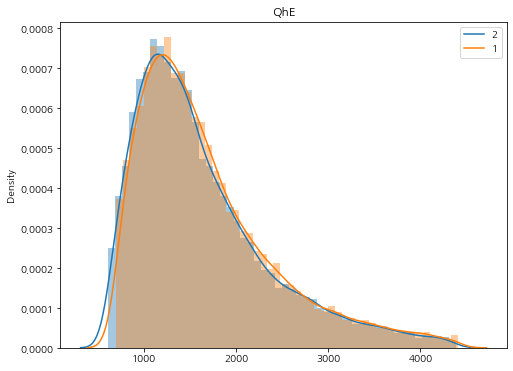

In [13]:
plot_to_voted(data, max_mean, data_y.unique())

### 2-2 : min_std의 분포를 seaborn의 distplot을 이용해서 응답과 비교해보세요

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


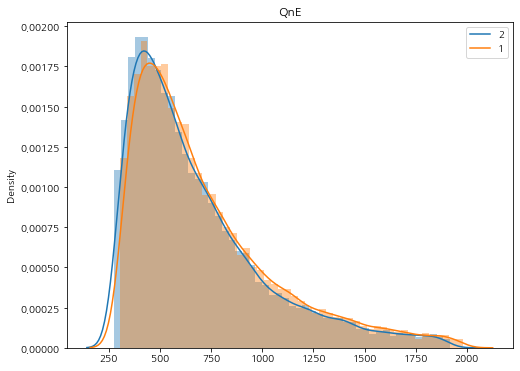

In [14]:
# sns.displot(data=data)
plot_to_voted(data, min_std, data_y.unique())

### 2-3 : QaA에 응답과 voted의 여부를 seaborn의 countplot을 이용해서 비교해보세요

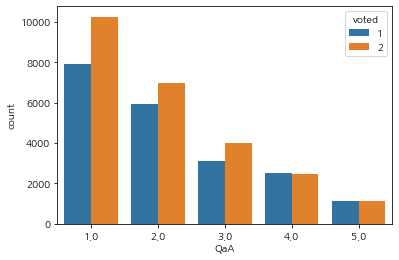

In [15]:
sns.countplot(data=data, x='QaA', hue=data_y)

### 2-4 : age_group의 분포를 matplotlib의 barchart를 이용해서 그려보세요

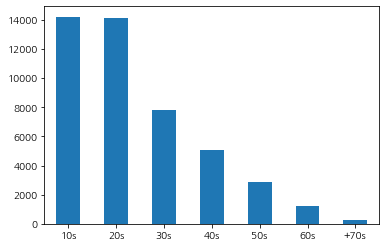

In [16]:
data['age_group'].value_counts().plot(kind='bar', rot=0)

### 2-5 : 자신만의 가설 두 가지를 세우고 분석해보세요

### 가설 1. 학력이 높을수록 투표율이 높을 것이다.

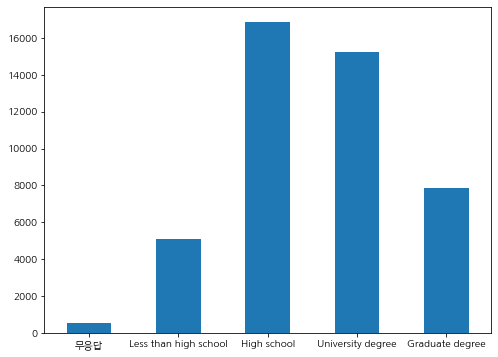

In [56]:
# 학력별 count
x_labels = ['무응답', 'Less than high school', 'High school', 'University degree', 'Graduate degree']
ax = data['education'].value_counts().sort_index().plot(kind='bar', rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
plt.show()

In [63]:
data.groupby('education')['voted'].value_counts(normalize=True).mul(100).unstack()

voted,1,2
education,,
0,47.727273,52.272727
1,4.972484,95.027516
2,36.703297,63.296703
3,59.650621,40.349379
4,61.968424,38.031576


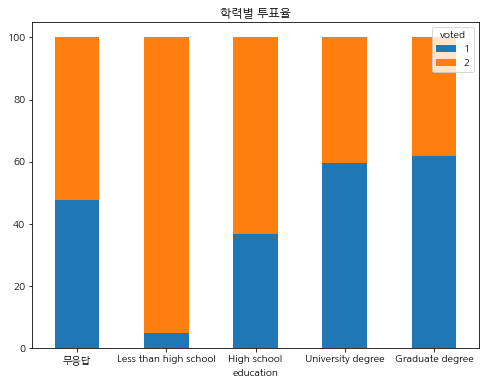

In [55]:
ax = data.groupby('education')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
ax.set_xticklabels(x_labels)
ax.set_title('학력별 투표율')
plt.show()

## 가설 2. 실존하는 해당 단어의 정의을 많이 알수록 투표율이 높을 것이다 

In [138]:
# wr_(01~13) : 실존하는 해당 단어의 정의을 앎

def set_count(row):
    row['know_count'] = len([x for x in row.values.tolist() if x == 1])
    return row;

know_count_df = data.loc[:, 'wr_01': 'wr_13'].apply(set_count, axis=1)

In [139]:
know_count_df = know_count_df.assign(voted=data_y)

In [140]:
know_count_df

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,know_count,voted
0,0,1,0,0,1,0,1,1,0,1,0,1,1,7,2
1,0,1,0,1,1,0,1,1,0,1,0,1,1,8,2
2,1,1,0,1,1,0,1,1,1,1,0,1,1,10,1
3,0,1,0,0,0,0,0,1,0,1,0,1,1,5,1
4,1,1,0,1,1,1,1,1,0,1,1,1,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1,1,0,1,1,0,1,1,1,1,0,1,1,10,2
45528,1,1,1,1,1,0,1,1,1,1,0,1,1,11,2
45529,1,1,0,1,1,0,1,1,0,1,0,1,1,9,1
45530,1,1,0,1,1,0,1,1,1,1,0,1,1,10,1


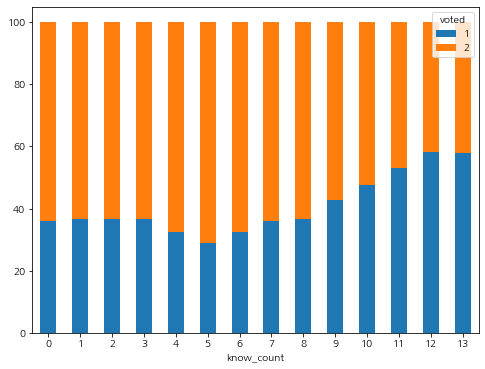

In [144]:
ax = know_count_df.groupby('know_count')['voted'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True, rot=0, figsize=(8, 6))
plt.show()